In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import copy

In [2]:
auxiliary_path = 'auxiliary_images/'
training_path = 'train/Task1/'

In [3]:
config_imgs = []
for img_path in os.listdir(auxiliary_path):
    config_imgs.append(cv2.imread(auxiliary_path + img_path))

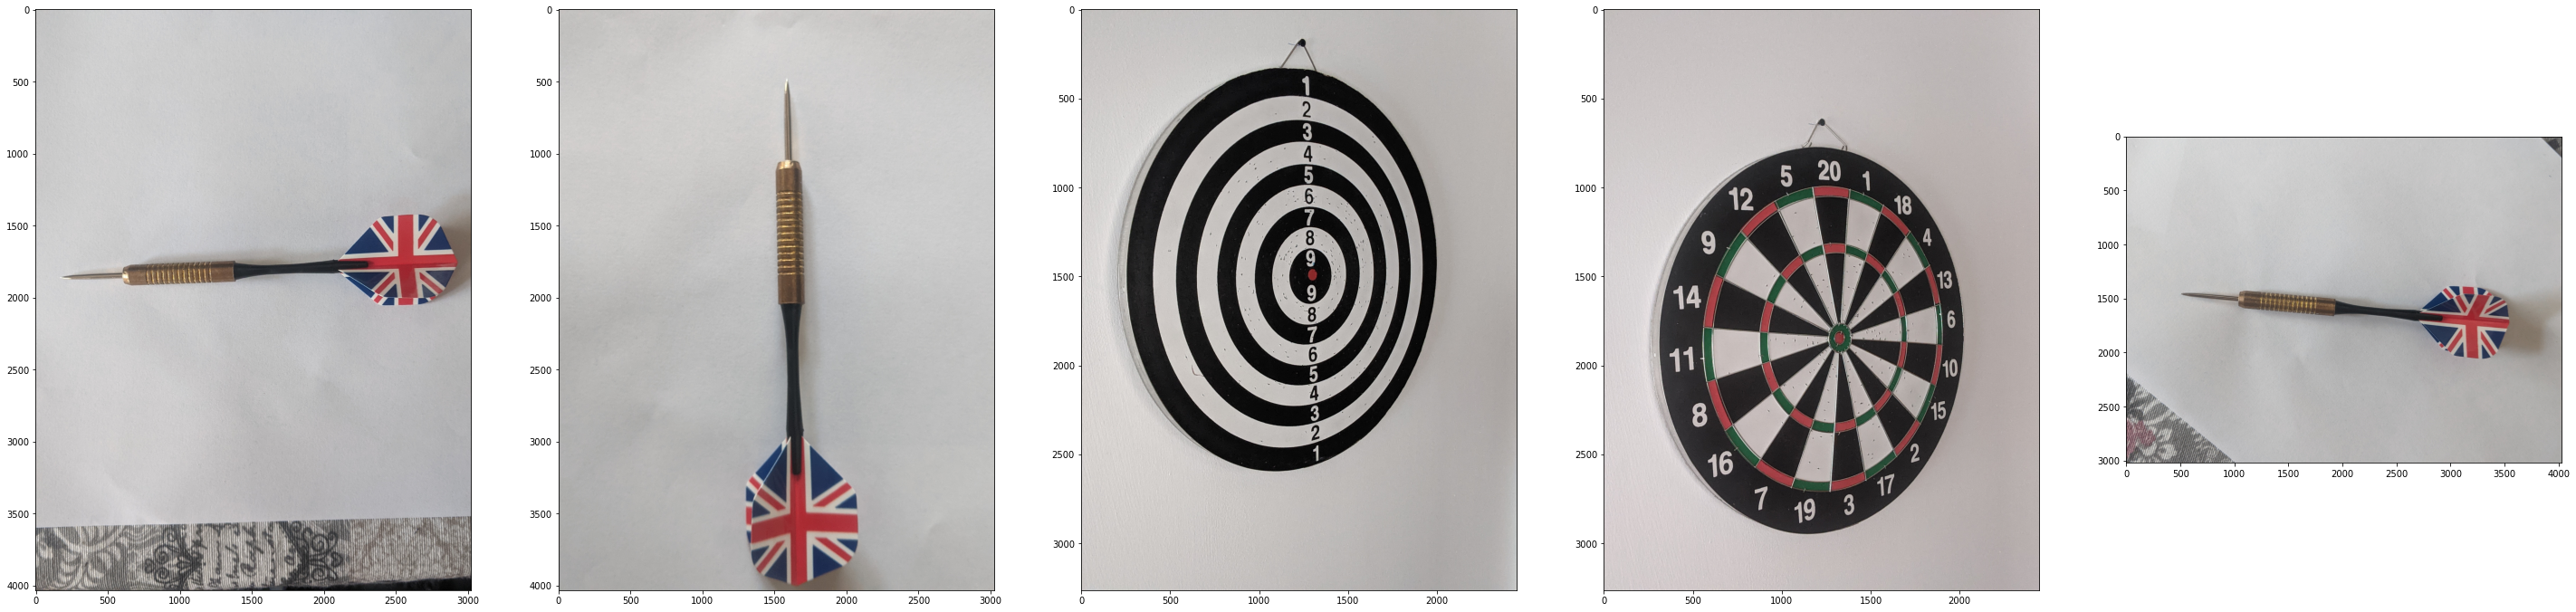

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize = (50,50))

i = 0
for img in copy.deepcopy(config_imgs):
    ax = plt.subplot(1, 5, i + 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    i += 1


In [5]:
imgs, confs_ = [], []
for f in sorted(os.listdir(training_path)):
    if f[-4:] == '.jpg':
        fname = f.split('.')[0]
        imgs.append(cv2.imread(training_path + fname + '.jpg'))
        with open(training_path + fname + '.txt', 'r') as rf:
            confs_.append(rf.read())


In [6]:
len(imgs)

25

#### sfagdfg

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize = (100,100))
# fig.tight_layout()

i = 0
for img, conf_ in copy.deepcopy(zip(imgs, confs_)):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(f"{i}:\n" + conf_)
    
    i += 1


In [52]:
sample_img = copy.deepcopy(imgs[0])
template_img = copy.deepcopy(config_imgs[0])

In [ ]:
plt.imshow(template_img)

In [ ]:
plt.imshow(template_img[1000:2500,:])

In [55]:
template_img = template_img[1000:2500,:]

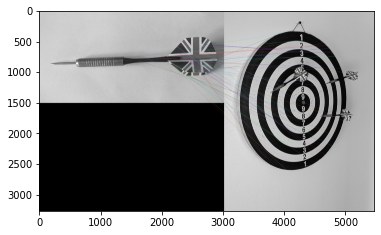

In [61]:
template_ = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
img_ = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)

#s    
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(template_,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(sample_img,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(template_, keypoints_1, img_, keypoints_2, matches[:50], img_, flags=2)

plt.imshow(img3)
plt.show()

#### Working t1

In [ ]:
lower_template = (0, 0, 0)
upper_template  = (180,255,50)

lower_red = (0,100,30)
upper_red = (180,255,200)

template_ = copy.deepcopy(config_imgs[2])
hsv_img = cv2.cvtColor(template_, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_img, lower_template, upper_template)
mask_red = cv2.inRange(hsv_img, lower_red, upper_red)

min_area_red = 20 * 20
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours_red = [cnt for cnt in contours_red if cv2.contourArea(cnt) > min_area_red]

min_area = 75*75
contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
delimiters = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

print(len(contours_red))
print(len(delimiters))

delimiters.extend(contours_red)

cv2.drawContours(template_, delimiters, -1, (255,0,0), 3)
plt.figure(figsize = (50,50))
plt.imshow(template_)

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize = (100,100))
# fig.tight_layout()

lower = (5, 20, 40)
upper = (100,255,255)
kernel = np.ones((3, 3), np.uint8)
i = 0
for img, conf_ in copy.deepcopy(zip(imgs, confs_)):
    ax = plt.subplot(5, 5, i + 1)

    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_img, lower, upper)
    
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    filtered_cnt = []
    min_area = 40 * 50

    for cnt in contours[1:]:
        area = cv2.contourArea(cnt)
        if area > min_area:
            filtered_cnt.append(cnt)
    
    leftmost_points = []
    for cnt in filtered_cnt:
        max_x = img.shape[1]
        leftmost = None
        for point in cnt:

            if max_x > point[0][0]:
                max_x = point[0][0]
                leftmost = point[0]
                
        leftmost_points.append(leftmost)
        cv2.circle(img, leftmost, 10, (255, 255,0 ), -1)
    
    results = []
    for point in leftmost_points:

        level_value = 0
        for level in delimiters:
            if cv2.pointPolygonTest(level, (int(point[0]), int(point[1])), True) >= 0:
                level_value = level_value + 1
            else:
                if level_value != 0:
                    results.append(level_value)
        
    print(f"{i}: {len(results)}\n {results}")

    cv2.drawContours(img, delimiters, -1, (255,0,0), 3)
    
    plt.imshow(img)
    plt.title(f"{i}:\n" + conf_)
    
    #TODO: save results to file

    i += 1